## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mice_df = pd.merge(mouse_metadata, study_results)
# Display the data table for preview
mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = mice_df[mice_df[["Mouse ID", "Timepoint"]].duplicated()]
duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
dupe = mice_df[mice_df["Mouse ID"] == "g989"]
dupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# create new df with previous df and use .drop to clean list (also don't forgot .nunique ex line 7)
# possible to use .index
dupe_index = mice_df[mice_df['Mouse ID'] == 'g989'].index
cleaned_mice_df = mice_df.drop(dupe_index)
dupe_index
cleaned_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_df["Mouse ID"].nunique()

248

In [7]:
cleaned_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# grouped_usa_df = usa_ufo_df.groupby(['state'])
grouped_regimen = cleaned_mice_df.groupby(['Drug Regimen'])
# Assemble the resulting series into a single summary dataframe.
# grouped_regimen.count().head(20)
mean = grouped_regimen['Tumor Volume (mm3)'].mean()
median = grouped_regimen['Tumor Volume (mm3)'].median()
var = grouped_regimen['Tumor Volume (mm3)'].var()
std = grouped_regimen['Tumor Volume (mm3)'].std()
sems = grouped_regimen['Tumor Volume (mm3)'].sem()
grouped_regimen['Tumor Volume (mm3)'].sem()


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [9]:
cleaned_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median'])

,mean,median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Std Deviation": std, "SEM": summary_df.sem(axis = 1, skipna = False)})

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Std Deviation": std, "SEM": sems})

# summary_df.sem(axis = 1, skipna = False) this gives different result than using .agg method??
summary_df

# Using the aggregation method, produce the same summary statistics in a single line
# use .agg
# cleaned_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# use .agg
cleaned_mice_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [12]:
summary_df.columns

Index(['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM'], dtype='object')

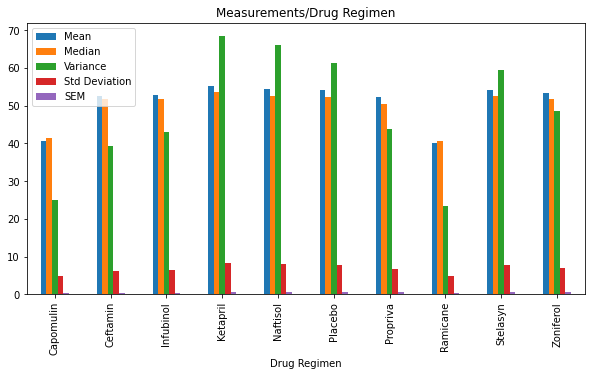

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

ax = summary_df[['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']].plot(kind='bar', 
                                                                             title='Measurements/Drug Regimen',
                                                                            figsize=(10,5))

KeyError: 'Drug Regime'

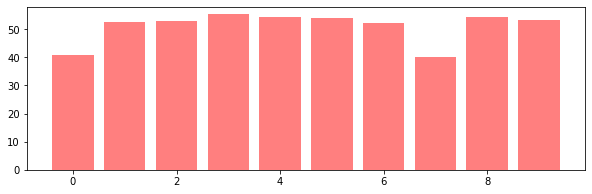

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#     regimen = list(summary_df.keys())
#     mean = list(summary_df['Mean'])
#     med = list(summary_df['Median'])

x_axis = np.arange(len(summary_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,3))
plt.bar(x_axis, summary_df["Mean"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, summary_df["Drug Regime"])
    
    


In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
cleaned_mice_df.columns

# cleaned_mice_df.groupby["Mouse ID"][cleaned_mice_df['Sex'] == 'Female'].count()
grouped_by_ID = cleaned_mice_df.groupby(['Drug Regimen'])

grouped_by_ID.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [17]:
# Matplotlib - Day 3 - Activity 3
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Matplotlib - Day 3 - Activity 3

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
